# Tanzanian financial services

### Setting up the notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium

### Importing  data

In [2]:
training_data = pd.read_csv('training.csv')

In [3]:
training_data=training_data.rename(columns ={'Q1':'Age','Q2':'Gender','Q3':'Marital_status','Q4':'Level_of_education',
                               'Q5':'Land_ownership','Q6':'Other_land_ownership','Q7':'Owning_a_mobile_phone',
                               'Q9':'Employer','Q10':'Product_sold','Q11':'Service_provided','Q13':'sending_money_out_date'
                               ,'Q15':'recent_date_money_recieved','Q14':'cash_recieved_non_domestically','Q16':'purchasing_frequency_for_using_mobile_money'
                               ,'Q17':'bill_frequency_for_using_mobile_money','Q18':'Literacy_in_Kiswhahili','Q19':'English_literacy',
                                             'Q8_1':'Salaries',"Q8_2":'Trading','Q8_3':'Service','Q8_4':'Casual_work','Q8_5':'Rental','Q8_6':'Interest',
                                             'Q8_7':'Pension','Q8_8':'Social_welfare','Q8_9':'Dependent','Q8_10':'Dont_get_money','Q8_11':'Other'
                              })

## 1.Missing values

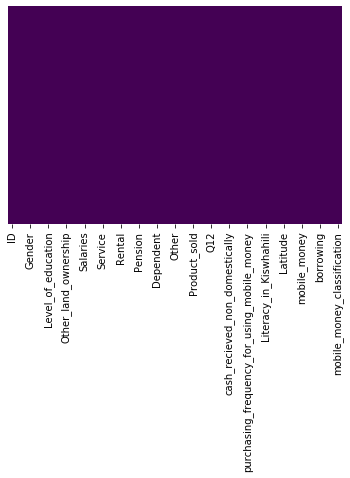

In [4]:
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

*From the above heatmap, the data has no missing variables.*

## 2.Getting descriptive data

In [5]:
training_data.describe()

,ID,Age,Gender,Marital_status,Level_of_education,Land_ownership,Other_land_ownership,Owning_a_mobile_phone,Salaries,Trading,...,bill_frequency_for_using_mobile_money,Literacy_in_Kiswhahili,English_literacy,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


*This dataframe contains 7094 rows and 37 columns.
There are 7094 ID entries meaning that it is  working with 7094 people.
There are 37 series or features that are known about each individual.*
*The tabele above shows the mean,standard deviation,minimum,maximum and interquartile ranges for each column.*

# Visualization

## 3.Financial services accessed.

In [6]:
dict_name = {0:'no_mobile_and_no_service',1:'no_mobile_atleast_one_service',2:'mobile_only',3:'mobile_and_atleast_one_service'}
training_data['mobile_money_classification']=training_data.mobile_money_classification.map(dict_name)

In [7]:
dict_name = {-1:'N/A',1:'Yesterday/Today',2:'Past_7_days',3:'Past_30_days',4:'Past_90_days',5:'More_than_90_days_but_less_than_6_months',6:'6_months_or_longer'}
training_data['sending_money_out_date']=training_data.sending_money_out_date.map(dict_name)

In [8]:
dict_name = {-1:'N/A',1:'Yesterday/Today',2:'Past_7_days',3:'Past_30_days',4:'Past_90_days',5:'More_than_90_days_but_less_than_6_months',6:'6_months_or_longer'}
training_data['recent_date_money_recieved']=training_data.recent_date_money_recieved.map(dict_name)

### mobile_money_classification and Age

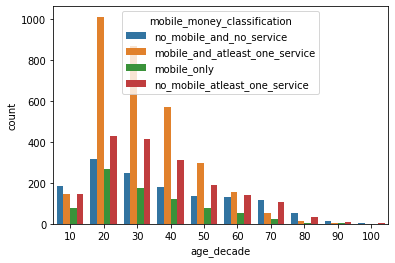

In [9]:
training_data['age_decade']=training_data.Age.apply(lambda x : int(x/10)*10)
sns.countplot(x='age_decade',hue='mobile_money_classification',data = training_data)
plt.show()

*The age group of 20s and 30s mostly use mobile money and at least one other financial service.*
*The reason could be that they have access to mobile devices such as a smart phone.*

### mobile_money_classification and Gender

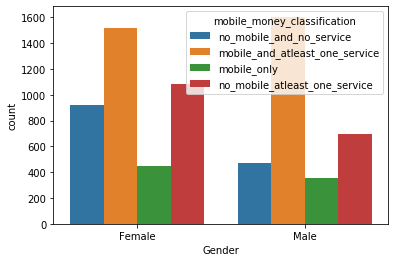

In [10]:
dict_name = {1:'Male',2:'Female'}
training_data['Gender']=training_data.Gender.map(dict_name)
sns.countplot(x='Gender',hue='mobile_money_classification',data=training_data)
plt.show()

*Both genders do use mobile money and at least one other finacial sercive but males use it a bit more than females.*
*However females use more mobile money only than males.*

### mobile_money_classification and Marital Status

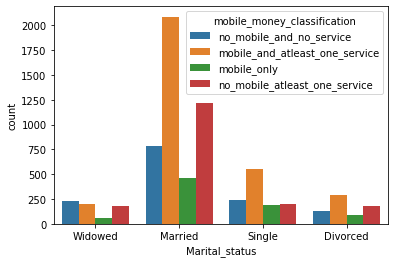

In [11]:

dict_name = {1:'Married',2:'Divorced',3:'Widowed',4:'Single'}
training_data['Marital_status']=training_data.Marital_status.map(dict_name)
sns.countplot(x='Marital_status',hue='mobile_money_classification',data=training_data)
plt.show()

*Mobile money and at least one other finacial service is mostly used by married people.*

### mobile_money_classification  and land ownership

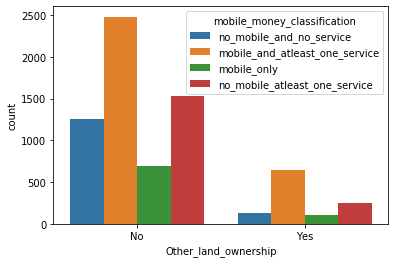

In [12]:
dict_name = {1:'Yes',2:'No'}
training_data['Other_land_ownership']=training_data.Other_land_ownership.map(dict_name)

sns.countplot(x='Other_land_ownership',hue='mobile_money_classification',data=training_data)
plt.show()

*Most people  who do not own land use mobile money and at least one of the financial services.*

### mobile_money_classification  and type of income

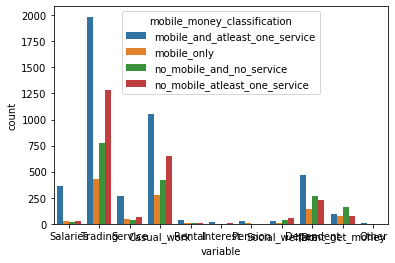

In [13]:
data_frame = training_data[['mobile_money_classification','Latitude','Longitude','sending_money_out_date','Gender','recent_date_money_recieved','Salaries','Trading','Service','Casual_work','Rental','Interest',
                                             'Pension','Social_welfare','Dependent','Dont_get_money','Other']].copy()
data_frame_melt = data_frame.melt(id_vars=['mobile_money_classification','Latitude','Longitude','sending_money_out_date','Gender','recent_date_money_recieved'])
counts=data_frame_melt[data_frame_melt.value==1]
sns.countplot(counts.variable,hue= 'mobile_money_classification',data =counts)
plt.show()




*The source of income that uses mobile_money and at least one other financial service is Trading followed by Casual labor.*

## 4.How often the mobile servives are used?

### How often using mobile_services and age

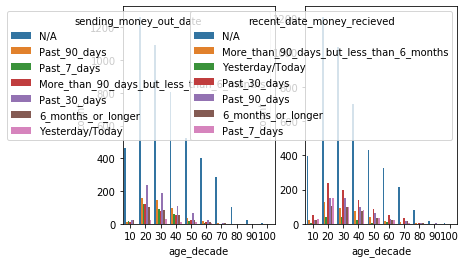

In [14]:
f, axes = plt.subplots(1, 2)
sns.countplot(x='age_decade',hue='sending_money_out_date',data=training_data, ax= axes[0])
sns.countplot(x='age_decade',hue='recent_date_money_recieved',data=training_data,ax =axes[1])
plt.show()

*Most people who sent and recieved money are in the age group of 20s in the past 30 days.*

### How often using mobile_services and gender

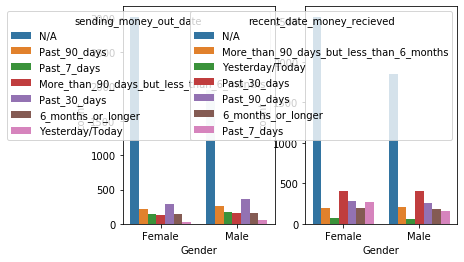

In [15]:
f, axes = plt.subplots(1, 2)
sns.countplot(x='Gender',hue='sending_money_out_date',data=training_data, ax = axes[0])
sns.countplot(x='Gender',hue='recent_date_money_recieved',data=training_data,ax = axes[1])
plt.show()

*Most people who sent money are males in the past 30 days.*
*Both males and females mostly recieved money in the last 30 days.*

### How often using mobile and Maritul status


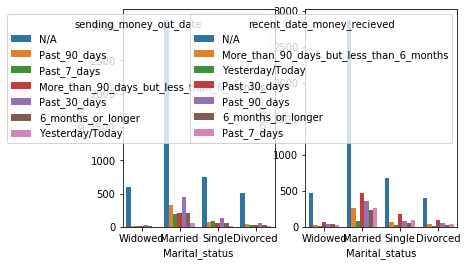

In [16]:
f, axes = plt.subplots(1, 2)
sns.countplot(x='Marital_status',hue='sending_money_out_date',data=training_data,ax=axes[0])
sns.countplot(x='Marital_status',hue='recent_date_money_recieved',data=training_data,ax=axes[1])
plt.show()

*Mostly married people sent and recieved money in the past 30 days.*

### How often using mobile and land ownership

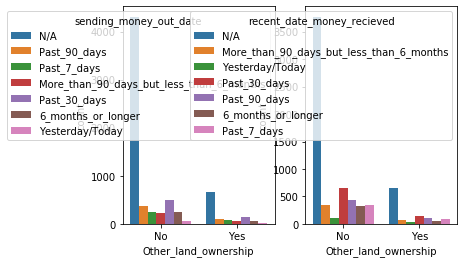

In [17]:
f, axes = plt.subplots(1, 2)
sns.countplot(x='Other_land_ownership',hue='sending_money_out_date',data=training_data,ax=axes[0])
sns.countplot(x='Other_land_ownership',hue='recent_date_money_recieved',data=training_data,ax=axes[1])
plt.show()

*Mostly people of which do not own land sent and recived money in the past 30 days.*

### How often using mobile and type of income

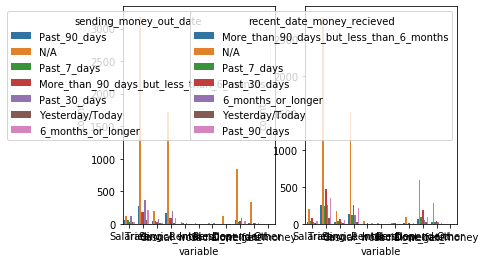

In [18]:
f, axes = plt.subplots(1, 2)
sns.countplot(counts.variable,hue='sending_money_out_date',data=counts,ax=axes[0])
sns.countplot(counts.variable,hue= 'recent_date_money_recieved',data =counts,ax=axes[1])
plt.show()

*The above plot shows that the type of income that is associated with sending
and recieving money frequently is Trading in the past 30 days*

## 5.Visual geographic distribution of mobile services 

In [19]:
from folium.plugins import MarkerCluster
map_it = folium.Map(location=[-4.460442,29.811396],zoom_start=6)
marker_cluster = MarkerCluster().add_to(map_it)
geo_data = counts[['Latitude','Longitude','variable']].head(1000)
geo_data.head()
for i in range(0,len(geo_data)):
    folium.Marker(
    [geo_data.iloc[i]['Latitude'],
     geo_data.iloc[i]['Longitude']
     
     
    
    ],popup=geo_data.iloc[i]['variable']
    ).add_to(marker_cluster)
    
map_it.save('Tanzania1')  
map_it

*The map shows that the use of financial services is mostly distributed
around the coast or places where there is water.*

## 6.Demographic factors associated with mobile money

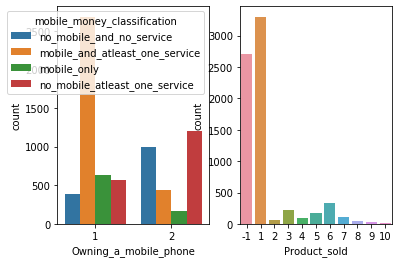

In [20]:
f, axes = plt.subplots(1, 2)
sns.countplot(x='Owning_a_mobile_phone',hue='mobile_money_classification',data=training_data,ax=axes[0])
sns.countplot(x='Product_sold',data=training_data,ax= axes[1])
plt.show()


*More people own mobile phones and they use mobile money and at least one other financial service.
Most people trade with crops they produce(Agriculture).*

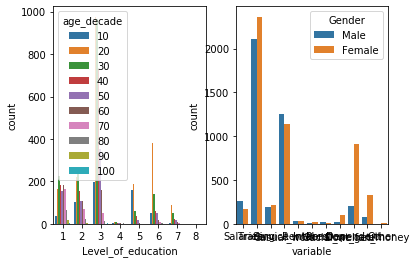

In [21]:
f, axes = plt.subplots(1, 2)
sns.countplot(x='Level_of_education',hue='age_decade',data=training_data,ax= axes[0])
sns.countplot(counts.variable,hue='Gender',data=counts,ax = axes[1])
plt.show()

*The age group of 20s is mostly educated to the level of tertiary 
followed by the age group of 30s.
Trading in crops is the highest form of trading and males take the lead*

## Conclusions about the financial services in Tanzania

*The most income comes from Trading
and it seems most trading takes place around the coast. The reason behind this
could be that most people are involved in agriculture.The mobile money services are 
mostly used by people who are in their 20s. These are the people who 
mostly have smartphones that can enable them to use mobile money services.This age group is most likey to be
literate and most likey English literate which makes it easier for them to use mobile money.Males use mobile 
money and at least one other finacial service.The reason for this could be that males are more
involved in agriculture than women.
Married people use mobile money and one other financial service compared to other marital statuses. 
The reason behind this could be that they have to send money to their spouses and children.*